# First Draft DataScope Exploration of CTA Data for a Business Looking to Locate in Chicago 

In [1]:
import pandas as pd
import numpy as np
import mplleaflet
import matplotlib.pyplot as plt


In [2]:
# Import the Turnstile Data
turnstile_data = pd.read_csv('CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv')
# import the Station Data
station_data = pd.read_csv('CTA_-_System_Information_-_List_of__L__Stops.csv')

In [3]:
turnstile_data.columns

Index([u'station_id', u'stationname', u'date', u'daytype', u'rides'], dtype='object')

In [4]:
station_data.columns

Index([u'STOP_ID', u'DIRECTION_ID', u'STOP_NAME', u'STATION_NAME',
       u'STATION_DESCRIPTIVE_NAME', u'MAP_ID', u'ADA', u'RED', u'BLUE', u'G',
       u'BRN', u'P', u'Pexp', u'Y', u'Pnk', u'O', u'Location'],
      dtype='object')

In [5]:
# We see that station ID is the same as MAP_ID
print "Number of Stop IDS", len(station_data['STOP_ID'].unique()) 
print "Number of Stations ID in Turnstile Data Set", len(turnstile_data['station_id'].unique())
print "Number of MAP ID's in Station Data", len(station_data['MAP_ID'].unique())

not_found = []
# BUT!!! These two Station ID are not in Map ID
for tid in turnstile_data['station_id'].unique():
    if not(tid in station_data['MAP_ID'].unique()):
        print "Value in Turnstile data Not found in Station Data", tid
        not_found.append(tid)
# 40500 is Washington/State  Maybe same as Library?
# 45180 is Homan and has almost all empty Values for number of rides 
#turnstile_data[turnstile_data['station_id'] == 40500]
#turnstile_data[turnstile_data['station_id'] == 41580]

# EXCLUDING THESE TWO VALUES IN EVALUATION OF DATA

Number of Stop IDS 300
Number of Stations ID in Turnstile Data Set 146
Number of MAP ID's in Station Data 144
Value in Turnstile data Not found in Station Data 40500
Value in Turnstile data Not found in Station Data 41580


In [6]:
pd.set_option('display.max_rows', 20)
#turnstile_data['station_id'].value_counts()

In [7]:
# Let's take a look at the Station Data
station_data

,STOP_ID,DIRECTION_ID,STOP_NAME,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,30162,W,18th (54th/Cermak-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
1,30161,E,18th (Loop-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
2,30022,N,35th/Archer (Loop-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
3,30023,S,35th/Archer (Midway-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
4,30214,S,35-Bronzeville-IIT (63rd-bound),35th-Bronzeville-IIT,35th-Bronzeville-IIT (Green Line),41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)"
5,30213,N,35-Bronzeville-IIT (Harlem-bound),35th-Bronzeville-IIT,35th-Bronzeville-IIT (Green Line),41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)"
6,30246,S,43rd (63rd-bound),43rd,43rd (Green Line),41270,True,False,False,True,False,False,False,False,False,False,"(41.816462, -87.619021)"
7,30245,N,43rd (Harlem-bound),43rd,43rd (Green Line),41270,True,False,False,True,False,False,False,False,False,False,"(41.816462, -87.619021)"
8,30025,S,51st (63rd-bound),51st,51st (Green Line),40130,True,False,False,True,False,False,False,False,False,False,"(41.80209, -87.618487)"
9,30024,N,51st (Harlem-bound),51st,51st (Green Line),40130,True,False,False,True,False,False,False,False,False,False,"(41.80209, -87.618487)"


In [8]:
# Remove STOP_ID, Directon_ID, and the Stop Name
station_data_cleaned = station_data.drop(station_data.columns[0:3], axis = 1)
station_data_cleaned.drop_duplicates(inplace=True)
station_data_cleaned

,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
2,35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
4,35th-Bronzeville-IIT,35th-Bronzeville-IIT (Green Line),41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)"
6,43rd,43rd (Green Line),41270,True,False,False,True,False,False,False,False,False,False,"(41.816462, -87.619021)"
8,51st,51st (Green Line),40130,True,False,False,True,False,False,False,False,False,False,"(41.80209, -87.618487)"
10,54th/Cermak,54th/Cermak (Pink Line),40580,True,False,False,False,False,False,False,False,True,False,"(41.85177331, -87.75669201)"
12,69th,69th (Red Line),40990,True,True,False,False,False,False,False,False,False,False,"(41.768367, -87.625724)"
14,79th,79th (Red Line),40240,True,True,False,False,False,False,False,False,False,False,"(41.750419, -87.625112)"
16,95th/Dan Ryan,95th/Dan Ryan (Red Line),40450,True,True,False,False,False,False,False,False,False,False,"(41.722377, -87.624342)"
17,95th/Ran Ryan,95th/Ran Ryan (Red Line),40450,True,True,False,False,False,False,False,False,False,False,"(41.722377, -87.624342)"


In [9]:
# Logically Combine the Different Color Line Stops at Each Station 
final_station_data = station_data_cleaned.groupby("MAP_ID").first()
logically_combined = station_data_cleaned.groupby("MAP_ID").any()[['ADA', 'RED', 'BLUE', 'G','BRN','P', 'Pexp','Y', 'Pnk', 'O']]
final_station_data[['ADA', 'RED', 'BLUE', 'G','BRN','P', 'Pexp','Y', 'Pnk', 'O']] = logically_combined
final_station_data

,STATION_NAME,STATION_DESCRIPTIVE_NAME,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
MAP_ID,,,,,,,,,,,,,
40010,Austin,Austin (Blue Line),False,False,True,False,False,False,False,False,False,False,"(41.870851, -87.776812)"
40020,Harlem/Lake,Harlem/Lake (Green Line),True,False,False,True,False,False,False,False,False,False,"(41.886848, -87.803176)"
40030,Pulaski,Pulaski (Green Line),True,False,False,True,False,False,False,False,False,False,"(41.885412, -87.725404)"
40040,Quincy/Wells,"Quincy/Wells (Brown, Orange, Purple & Pink Lines)",False,False,False,False,True,False,True,False,True,True,"(41.878723, -87.63374)"
40050,Davis,Davis (Purple Line),True,False,False,False,False,True,True,False,False,False,"(42.04771, -87.683543)"
40060,Belmont,Belmont (Blue Line),False,False,True,False,False,False,False,False,False,False,"(41.938132, -87.712359)"
40070,Jackson,Jackson (Blue Line),True,False,True,False,False,False,False,False,False,False,"(41.878183, -87.629296)"
40080,Sheridan,Sheridan (Red Line),False,True,False,False,False,False,False,False,False,False,"(41.953775, -87.654929)"
40090,Damen,Damen (Brown Line),True,False,False,False,True,False,False,False,False,False,"(41.966286, -87.678639)"


In [10]:
# A little Error Checking!

# In theory the two numbers below should be the same
print len(station_data['Location'].unique())
print len(final_station_data['Location'].unique())

# But they are not the same! Which value is different?
for location in station_data['Location'].unique():
    if not(location in final_station_data['Location'].unique()):
        print location
        
#   (41.867368, -87.627402) Corresponds to Roosevelt, This Also has an address at (41.867405, -87.62659)
#   Note how close the two stations are... thinking its basically the same but has two turnstiles
#   relatively far apart

145
144
(41.867368, -87.627402)


In [11]:
# Extract the station Location at a Numpy Array of the Latitude and Longitude
station_locations = final_station_data['Location']
cta_stations_lat_long = np.array([(float(x[1:-1].split(',')[0]),float(x[1:-1].split(',')[1])) for x in station_locations])
# Extract the station id/map_id at a Numpy Array of the Latitude and Longitude
cta_stations_station_id = np.array(station_locations.index)

In [12]:
cta_stations_lat_long.shape, cta_stations_station_id.shape

((144, 2), (144,))

In [13]:
final_station_data.columns

Index([u'STATION_NAME', u'STATION_DESCRIPTIVE_NAME', u'ADA', u'RED', u'BLUE',
       u'G', u'BRN', u'P', u'Pexp', u'Y', u'Pnk', u'O', u'Location'],
      dtype='object')

In [14]:
print "Total Number of Stations", len(final_station_data)
print "Red Line Stations", final_station_data.RED.value_counts()[1]
print "Blue Line Stations", final_station_data.BLUE.value_counts()[1]
print "Brown Line Stations", final_station_data.BRN.value_counts()[1]
print "Purple Line Stations", final_station_data.P.value_counts()[1]
print "Purple Express Line Stations", final_station_data.Pexp.value_counts()[1]
print "Green Line Stations", final_station_data.G.value_counts()[1]
print "Yellow Line Stations", final_station_data.Y.value_counts()[1]
print "Orange Line Stations", final_station_data.O.value_counts()[1]
print "Pink Line Stations", final_station_data.Pnk.value_counts()[1]
print "Number of ADA Compliant Stations", final_station_data.ADA.value_counts()[1]

# Note that I believe that all Purple Express Line Stations are also Purple Stations!

Total Number of Stations 144
Red Line Stations 33
Blue Line Stations 33
Brown Line Stations 28
Purple Line Stations 9
Purple Express Line Stations 26
Green Line Stations 31
Yellow Line Stations 3
Orange Line Stations 17
Pink Line Stations 23
Number of ADA Compliant Stations 97


In [15]:
# Assign Each Station Location a Color:
final_station_colors = []
station_colors = final_station_data[['RED', 'BLUE', 'G','BRN','P', 'Pexp','Y', 'Pnk', 'O']]
station_colors = np.array(station_colors)

# Verifying that all Purple Lines are Purple Express!  Treat as one
'''
for i,row in enumerate(station_colors):
    if row[4]:
        print i, row[5]
'''
station_colors = np.delete(station_colors,4,axis=1)
for i,row in enumerate(station_colors):
    if sum(row) > 1:
        final_station_colors.append('black')
    else:
        if row[0]:
            final_station_colors.append('red')
        elif row[1]:
            final_station_colors.append('blue')
        elif row[2]:
            final_station_colors.append('green')  
        elif row[3]:
            final_station_colors.append('brown')
        elif row[4]:
            final_station_colors.append('purple')
        elif row[5]:
            final_station_colors.append('yellow')
        elif row[6]:
            final_station_colors.append('pink')
        elif row[7]:
            final_station_colors.append('orange')
        else:
            "What color is this??"

final_station_colors = np.array(final_station_colors)

In [16]:
# Check that the arrays have the shape I think they should
len(final_station_colors), cta_stations_lat_long.shape

(144, (144, 2))

## Plotting The Stations on a map based on the color of their line 

In [17]:

#plt.hold(True)
for color in np.unique(final_station_colors):
    indices = final_station_colors==color
    plt.plot(cta_stations_lat_long[indices,1], cta_stations_lat_long[indices,0], 'o', 
         color = color, 
         alpha = 0.8)
    
mplleaflet.show(path='plot_cta_stations_on_map.html')
#mplleaflet.display()

In [18]:
# WHEEEE, Now we can map trends!

In [19]:
print "Number of rows present in the Turnstile Data", len(turnstile_data)
print turnstile_data.columns

Number of rows present in the Turnstile Data 809326
Index([u'station_id', u'stationname', u'date', u'daytype', u'rides'], dtype='object')


In [20]:
# How many different dates are present in the dataset?
print "Number of dates present", len(turnstile_data['date'].unique())

Number of dates present 5691


In [21]:
# How much data is available for each year?  (Note that below2016 has less data, just as one would expect)
for year in np.arange(2001,2017):
    print "Year:", year, "Number of data points", turnstile_data['date'].str.contains(str(year)).sum()

Year: 2001 Number of data points 51710
Year: 2002 Number of data points 51830
Year: 2003 Number of data points 51830
Year: 2004 Number of data points 51972
Year: 2005 Number of data points 51830
Year: 2006 Number of data points 51830
Year: 2007 Number of data points 51830
Year: 2008 Number of data points 51972
Year: 2009 Number of data points 51496
Year: 2010 Number of data points 51465
Year: 2011 Number of data points 52083
Year: 2012 Number of data points 52126
Year: 2013 Number of data points 51925
Year: 2014 Number of data points 52195
Year: 2015 Number of data points 52560
Year: 2016 Number of data points 30672


In [22]:
turnstile_2016_data = turnstile_data[turnstile_data['date'].str.contains(str(2016))]

In [23]:
# Observation U = Sunday or Holiday, A = Saturday.  W = Weekdays, Not certain of this!

In [24]:
weekend_holiday = turnstile_2016_data['daytype'].str.contains('A') | turnstile_2016_data['daytype'].str.contains('U')
aggregated_rides = np.array(pd.DataFrame(turnstile_2016_data[weekend_holiday].groupby("station_id").sum())['rides'])
map_ids = np.array(pd.DataFrame(turnstile_2016_data[weekend_holiday].groupby("station_id").sum()).index)

In [25]:
min(aggregated_rides), max(aggregated_rides)

(154, 744484)

In [26]:
print "Ranked Stations by Weekend/Holiday Ridership"

for i, (station_name, net_weekend_ridership) in enumerate(sorted(zip([final_station_data[final_station_data.index==mid]['STATION_DESCRIPTIVE_NAME'].values[0] for mid in map_ids],
                                                                aggregated_rides),key = lambda x: x[1], reverse = True)):
    print i, station_name, ":", net_weekend_ridership

Ranked Stations by Weekend/Holiday Ridership
0 Lake (Red Line) : 744484
1 Chicago (Red Line) : 720897
2 Grand (Red Line) : 689804
3 O'Hare (Blue Line) : 619901
4 Belmont (Red, Brown & Purple Lines) : 614609
5 Roosevelt (Red, Orange & Green Lines) : 541322
6 Addison (Red Line) : 498006
7 Fullerton (Red, Brown & Purple Lines) : 484179
8 Clark/Division (Red Line) : 393775
9 95th/Dan Ryan (Red Line) : 392961
10 Clark/Lake (Blue, Brown, Green, Orange, Purple & Pink Lines) : 374379
11 Washington (Blue Line) : 352125
12 North/Clybourn (Red Line) : 312481
13 State/Lake (Brown, Green, Orange, Pink & Purple Lines) : 306167
14 79th (Red Line) : 297245
15 Damen (Blue Line) : 296813
16 Monroe (Red Line) : 291971
17 Midway (Orange Line) : 278255
18 Jackson (Red Line) : 276683
19 Randolph/Wabash (Brown, Green, Orange, Pink & Purple Lines) : 269872
20 Cermak-Chinatown (Red Line) : 265443
21 Adams/Wabash (Brown, Green, Orange, Pink & Purple Lines) : 253599
22 Logan Square (Blue Line) : 249223
23 Howard

In [27]:
# WHAT STOPS ARE POPULAR ON WEEKENDS AND HOLIDAYS!   Making Stop Size Proportional to Ridership

# This scales the size of the dots
ms_scale = 50000.
for station_id,lat_lng,color in zip(cta_stations_station_id,cta_stations_lat_long,final_station_colors):
    ind = np.where(map_ids==station_id)[0][0]
    agg_rides = aggregated_rides[ind]
    
    plt.plot(lat_lng[1], lat_lng[0], 'o', 
         color = color, ms = agg_rides/ms_scale,
         alpha = 0.5)
    
mplleaflet.show(path='plot_cta_stations_weekends_2016.html')
#mplleaflet.display()

In [28]:
weekday = turnstile_2016_data['daytype'].str.contains('W') 
aggregated_rides = np.array(pd.DataFrame(turnstile_2016_data[weekday].groupby("station_id").sum())['rides'])
map_ids = np.array(pd.DataFrame(turnstile_2016_data[weekday].groupby("station_id").sum()).index)


In [29]:
print "Ranked Stations by Weekday Ridership"
for i, (station_name, net_weekday_ridership) in enumerate(sorted(zip([final_station_data[final_station_data.index==mid]['STATION_DESCRIPTIVE_NAME'].values[0] for mid in map_ids],
                                                                aggregated_rides),key = lambda x: x[1], reverse = True)):
    print i, station_name, ":", net_weekday_ridership

Ranked Stations by Weekday Ridership
0 Lake (Red Line) : 3279652
1 Clark/Lake (Blue, Brown, Green, Orange, Purple & Pink Lines) : 3093500
2 Chicago (Red Line) : 2284224
3 Fullerton (Red, Brown & Purple Lines) : 1970957
4 Belmont (Red, Brown & Purple Lines) : 1896210
5 Washington (Blue Line) : 1819789
6 Grand (Red Line) : 1809420
7 Monroe (Red Line) : 1722115
8 Jackson (Red Line) : 1693239
9 O'Hare (Blue Line) : 1655853
10 Roosevelt (Red, Orange & Green Lines) : 1655090
11 95th/Dan Ryan (Red Line) : 1630959
12 State/Lake (Brown, Green, Orange, Pink & Purple Lines) : 1486540
13 Randolph/Wabash (Brown, Green, Orange, Pink & Purple Lines) : 1466559
14 Adams/Wabash (Brown, Green, Orange, Pink & Purple Lines) : 1397263
15 Midway (Orange Line) : 1320619
16 Addison (Red Line) : 1278645
17 Washington/Wells (Brown, Orange, Purple & Pink Lines) : 1234528
18 Quincy/Wells (Brown, Orange, Purple & Pink Lines) : 1213606
19 Clark/Division (Red Line) : 1210776
20 Monroe (Blue Line) : 1187633
21 Merchan

In [30]:
# WHAT STOPS ARE POPULAR ON WEEKDAYS!   Making Stop Size Proportional to Ridership

ms_scale = 50000.
for station_id,lat_lng,color in zip(cta_stations_station_id,cta_stations_lat_long,final_station_colors):
    ind = np.where(map_ids==station_id)[0][0]
    agg_rides = aggregated_rides[ind]
    
    plt.plot(lat_lng[1], lat_lng[0], 'o', 
         color = color, ms = agg_rides/ms_scale,
         alpha = 0.5)
    
mplleaflet.show(path='plot_cta_stations_weekdays_2016.html')
#mplleaflet.display()

In [31]:
# NEXT IT WOULD BE FUN TO USE GEOPANDAS TO USE POLYGONS DEFINED 
# OVER THE CITY OF CHICAGO AND THEN COLOR THOSE POLYGONS 
# BASED ON A MEASURE OF THE PROJECTED INCIDENTAL FOOT TRAFFIC IN THAT POLYGON

In [32]:
# Let's look at some general trends of ridership on the CTA

In [33]:
years = np.arange(2001,2017,1)
turnstile_year_data = []
for i,year in enumerate(years):
    turnstile_year_data.append(turnstile_data[turnstile_data['date'].str.contains(str(year))])

In [34]:
turnstile_2016_data[weekday]['rides'].sum()

92188240

In [35]:
agg_rides_per_year_weekday = []
for i in range(len(years)):
    weekday = turnstile_year_data[i]['daytype'].str.contains('W')
    agg_rides_per_year_weekday.append(turnstile_year_data[i][weekday]['rides'].sum())

In [36]:
agg_rides_per_year_weekend = []
for i in range(len(years)):
    weekend = turnstile_year_data[i]['daytype'].str.contains('A') | turnstile_year_data[i]['daytype'].str.contains('U')

    agg_rides_per_year_weekend.append(turnstile_year_data[i][weekend]['rides'].sum())

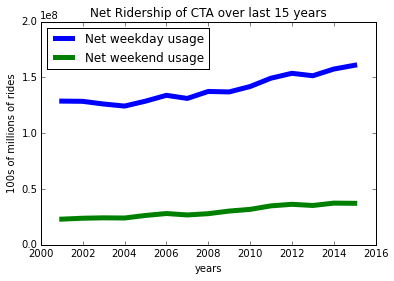

In [37]:
%matplotlib inline
plt.plot(years[:-1],agg_rides_per_year_weekday[:-1], lw = 5, label = 'Net weekday usage')
plt.plot(years[:-1],agg_rides_per_year_weekend[:-1], lw = 5, label = 'Net weekend usage')

plt.title('Net Ridership of CTA over last 15 years')
plt.xlabel('years')
plt.ylim([0,2e8])
plt.ylabel('100s of millions of rides')
plt.legend(loc = 'upper left')